In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_excel("SuperstoreML.xls")

In [3]:
df.head()

,order_date,segment,sales
0,2017-11-08,Consumer,261.959991
1,2017-11-08,Consumer,731.940002
2,2017-06-12,Corporate,14.620000
3,2016-10-11,Consumer,957.577515
4,2016-10-11,Consumer,22.368000


In [5]:
# Filter the data for the Consumer category
df = df[df["segment"] == "Consumer"]

In [9]:
# Convert the Order Date to datetime format
df["order_date"] = pd.to_datetime(df["order_date"])

In [11]:
# Set the Order Date as the index
df.set_index("order_date", inplace=True)

In [13]:
# Resample the data to daily frequency and sum the sales for each day
daily_sales = df["sales"].resample("D").sum().fillna(0)

In [14]:
# Create a new DataFrame with the sales for the last 30 days..
last_30_days = daily_sales[-30:]

In [15]:
# Create a feature matrix and target vector
X = np.arange(len(daily_sales)).reshape(-1, 1)
y = daily_sales.values

In [16]:
# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [17]:
# Predict the sales for the next 30 days
next_30_days = model.predict(np.arange(len(daily_sales), len(daily_sales) + 30).reshape(-1, 1))

In [18]:
# Create a datetime index for the next 30 days
dates = pd.date_range(daily_sales.index[-1], periods=30, freq="D")

In [19]:

# Create a DataFrame with the predicted sales
predicted_sales = pd.DataFrame({"Date": dates, "Sales": next_30_days})

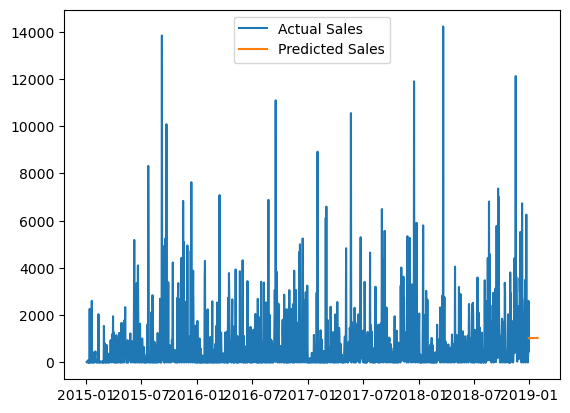

In [20]:
# Plot the actual sales and predicted sales
plt.plot(daily_sales.index, daily_sales.values, label="Actual Sales")
plt.plot(predicted_sales["Date"], predicted_sales["Sales"], label="Predicted Sales")
plt.legend()
plt.show()

In [21]:
# Export the DataFrame to an Excel file
predicted_sales.to_excel("predicted_sales.xlsx", index=False)